<a href="https://colab.research.google.com/github/NilbertoFreitas/ParadigmasT04/blob/main/T04_Aprofundamento_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link do Jupyter Notebook: https://github.com/NilbertoFreitas/ParadigmasT04/blob/main/T04_Aprofundamento_02.ipynb

Considerando a evolução da renda per capita (em Dólar USD) no Brasil esta análise se propõe a verificar possível correlação entre este indicador e a melhoria de vida da população analisando o IDH Índice de Desenvolvimento Humano e o consumo de bens, serviços e lazer através dos seguintes indicadores:

- Quantidade total de linhas de celular ativas
- Número total de pessoas que usaram a internet nos últimos 3 meses
- Número total de viagens a turismo (no exterior)

In [103]:
import pandas as pd

renda = pd.read_csv('https://raw.githubusercontent.com/NilbertoFreitas/ParadigmasT04/main/renda_per_capita.csv')
celulares = pd.read_csv('https://raw.githubusercontent.com/NilbertoFreitas/ParadigmasT04/main/cell_phones_total.csv')
IDH = pd.read_csv('https://raw.githubusercontent.com/NilbertoFreitas/ParadigmasT04/main/idh.csv')
internet = pd.read_csv('https://raw.githubusercontent.com/NilbertoFreitas/ParadigmasT04/main/net_users_num.csv')
turismo_parte = pd.read_csv('https://raw.githubusercontent.com/NilbertoFreitas/ParadigmasT04/main/turismo_int_parte.csv')

# Preparação dos Dados

Seleção dos dados filtrando apenas o Brasil

In [104]:
renda = renda[renda.country == 'Brazil']
celulares = celulares[celulares.country == 'Brazil' ]
IDH = IDH[IDH.country == 'Brazil' ]
internet = internet[internet.country == 'Brazil' ]
turismo_parte = turismo_parte[turismo_parte.country == 'Brazil' ]


In [105]:
renda_BR = pd.melt(renda, id_vars=['country'])
renda_BR = renda_BR.rename(columns={'variable':'year','value':'income'})

IDH_BR = pd.melt(IDH, id_vars=['country'])
IDH_BR = IDH_BR.rename(columns={'variable':'year','value':'dhi'})

celulares_BR = pd.melt(celulares, id_vars=['country'])
celulares_BR = celulares_BR.rename(columns={'variable':'year','value':'cell_phone'})

internet_BR = pd.melt(internet, id_vars=['country'])
internet_BR = internet_BR.rename(columns={'variable':'year','value':'net_users'})

turismo_parte_BR = pd.melt(turismo_parte, id_vars=['country'])
turismo_parte_BR = turismo_parte_BR.rename(columns={'variable':'year','value':'tourism'})

In [110]:
# Juntando os Datasets em um único Dataframe

BR = pd.merge(renda_BR,IDH_BR,on=['country','year'])
BR = pd.merge(BR,celulares_BR,on=['country','year'])
BR = pd.merge(BR,internet_BR,on=['country','year'])
BR = pd.merge(BR,turismo_parte_BR,on=['country','year'])

# Visualização e Análise dos Dados

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [112]:
# Na importação do CSV os dados das colunas abaixo estão como 'object' necessário a função a seguir para transformar os dados em numérico e 
# possibilitar a normalização dos dados a seguir
BR[['income', 'cell_phone', 'net_users', 'tourism']] = BR[['income', 'cell_phone', 'net_users', 'tourism']].apply(pd.to_numeric)

# Normalização dos dados, tendo em vista as bases estarem em escalas muito diferentes
for c in BR[['income', 'dhi', 'cell_phone', 'net_users', 'tourism']]:
  BR[c] = BR[c] / BR[c].max()

BR.dtypes

country        object
year           object
income        float64
dhi           float64
cell_phone    float64
net_users     float64
tourism       float64
dtype: object

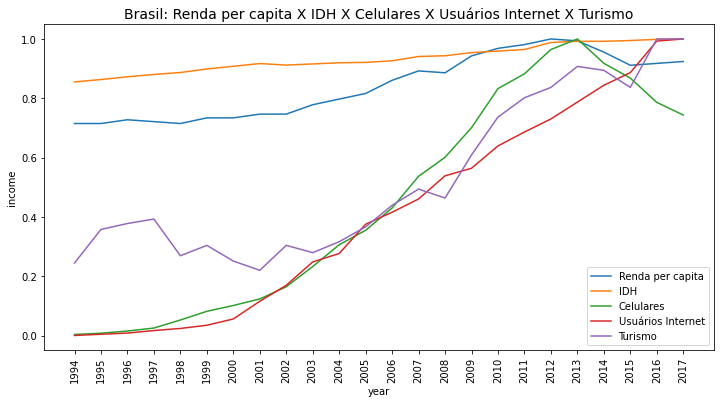

In [115]:
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=BR.income, label='Renda per capita')
sns.lineplot(x=BR.year, y=BR.dhi, label='IDH')
sns.lineplot(x=BR.year, y=BR.cell_phone, label='Celulares')
sns.lineplot(x=BR.year, y=BR.net_users, label='Usuários Internet')
sns.lineplot(x=BR.year, y=BR.tourism, label='Turismo')

plt.title('Brasil: Renda per capita X IDH X Celulares X Usuários Internet X Turismo', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

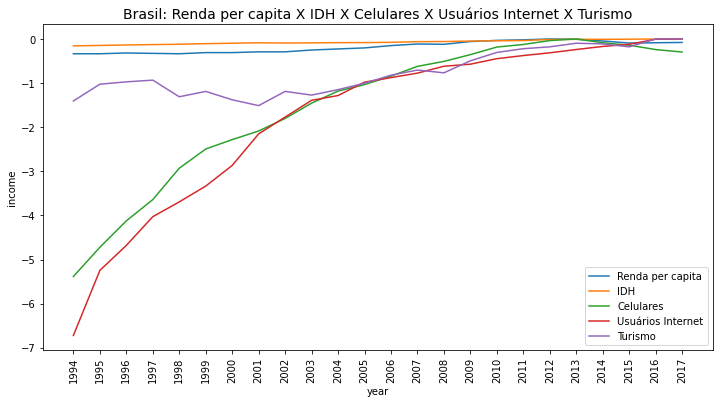

In [117]:
import numpy as np 
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=np.log( BR.income ), label='Renda per capita')
sns.lineplot(x=BR.year, y=np.log(BR.dhi), label='IDH')
sns.lineplot(x=BR.year, y=np.log(BR.cell_phone), label='Celulares')
sns.lineplot(x=BR.year, y=np.log(BR.net_users), label='Usuários Internet')
sns.lineplot(x=BR.year, y=np.log(BR.tourism), label='Turismo')


plt.title('Brasil: Renda per capita X IDH X Celulares X Usuários Internet X Turismo', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Conclusões

> *Os dados mostram um forte correlação entre os dados até aproximadamente o ano de 2013 quando tem início uma pequena disparidade entre alguns indicadores. O IDH apesar de crescente mantém-se praticamente estável no período observado. A renda per capita mostra uma maior correlação com a compra de celulares, inclusive ambas seguindo a mesma tendência de queda a partir de 2013. Os usuários de internet tiveram uma expressiva ascenção no período continuando subindo mesmo após a queda de renda observada a partir de 2013. O turismo foi o indicador que apresentou maior oscilação estando em alguns momentos em movimento contrário à variação da renda per capita, aparentando, mesmo que de forma estranha, não ter relação com a renda.* 